In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X = data.data
Y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print(f'R2 Score:{r2_score(Y_test,Y_pred)}')
print(f'Root Mean Square Error:{(mean_squared_error(Y_test,Y_pred))**(1/2)}')

R2 Score:0.5188113124539249
Root Mean Square Error:48.72713760953253


In [8]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001) #Hyper-Parameter Lambda.

In [9]:
R.fit(X_train,Y_train)

Ridge(alpha=0.0001)

In [10]:
Y_pred1 = R.predict(X_test)

In [11]:
print(f'R2 Score:{r2_score(Y_test,Y_pred1)}')
print(f'Root Mean Square Error:{(mean_squared_error(Y_test,Y_pred1))**(1/2)}')

R2 Score:0.5189732635884949
Root Mean Square Error:48.71893700181956


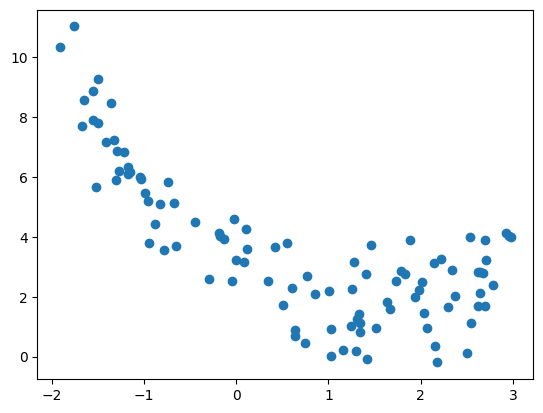

In [12]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1 ** 2 - 2* x1 + 3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

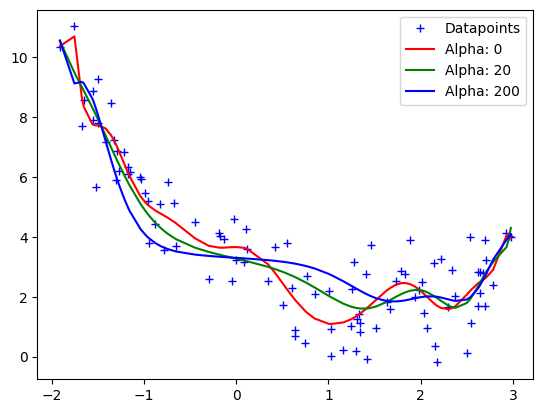

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alpha = [0,20,200]
cs = ['r','g','b']
plt.plot(x1,x2,'b+', label='Datapoints')



for alpha, c in zip(alpha,cs):
    pred = get_preds_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]),pred[np.argsort(x1[:,0])], c,label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

## Note
    1. alpha 0 = Case for overfitting
    2. alpha 200 = Case for underfitting
    3. alpha 20 = Optimal Model